In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.morphology import binary_erosion, binary_dilation

In [2]:
def hit_or_miss (a,x,w):
    p1 = binary_erosion (a,x)
    p2 = binary_erosion ((1-a),w)
    return p1*p2

img= [[0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0]
 [0 1 1 1 0 0 0]
 [0 1 1 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 0 0]
 [0 1 1 1 1 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0]]
img.type= uint8


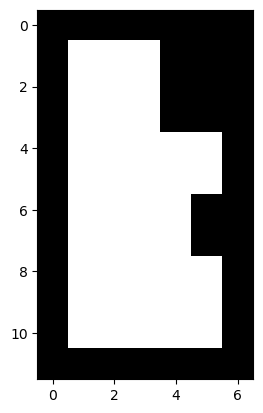

In [3]:
img = 1-(io.imread('afinamento.pbm')/255).astype('uint8')
print ('img=',img)
print ('img.type=',img.dtype)
plt.imshow(img,cmap='gray')

## Afinamento
### Definição dos elementos estruturantes

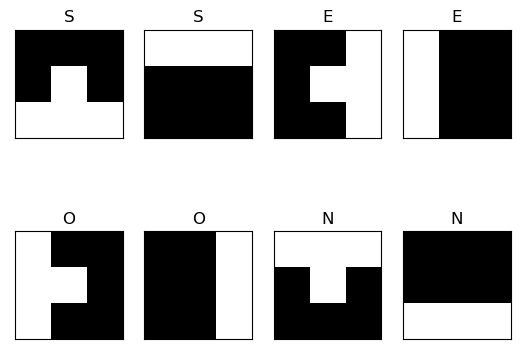

In [25]:
label = ['S','E','O','N']
b_set=[]
s=np.zeros((3,3))       ## EE Sul
s[1,1]=1
s[2,:]=1
sc=np.zeros((3,3))
sc[0,:]=1
b_set.append ((s,sc))
s=s.T                   ## EE Leste
sc=sc.T
b_set.append ((s,sc))
s=s[::-1,::-1]          ## EE Oeste
sc=sc[::-1,::-1]
b_set.append ((s,sc))
s=s.T                   ## EE Norte
sc=sc.T
b_set.append ((s,sc))
_,ax = plt.subplots (2,4)
v = ax.ravel()
for i in range(4):
    v[2*i].imshow(b_set[i][0],cmap='gray')
    v[2*i].set_xticks([])
    v[2*i].set_yticks([])
    v[2*i].set_title(label[i])
    v[2*i+1].imshow(b_set[i][1],cmap='gray')
    v[2*i+1].set_xticks([])
    v[2*i+1].set_yticks([])
    v[2*i+1].set_title(label[i])

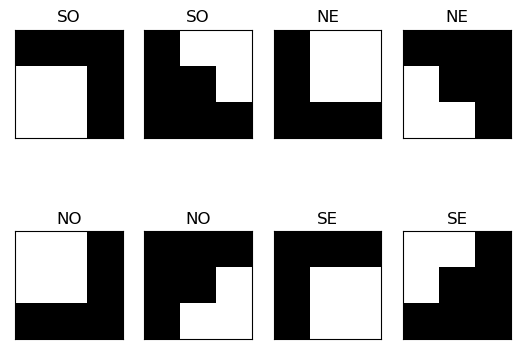

In [26]:
label = ['SO','NE','NO','SE']
s=np.zeros((3,3))       ## EE Sudoeste
s[1,:2]=1
s[2,:2]=1
sc=np.zeros((3,3))
sc[0,1:3]=1
sc[1,2]=1
b_set.append ((s,sc))
s=s.T                   ## EE Nordeste
sc=sc.T
b_set.append ((s,sc))
s=s[:,::-1]             ## EE Noroeste
sc=sc[:,::-1]
b_set.append ((s,sc))
s=s[::-1,::-1]          ## EE Sudeste
sc=sc[::-1,::-1]
b_set.append ((s,sc))
b_set.append ((s,sc))
_,ax = plt.subplots (2,4)
v = ax.ravel()
for i in range(4):
    v[2*i].imshow(b_set[i+4][0],cmap='gray')
    v[2*i].set_xticks([])
    v[2*i].set_yticks([])
    v[2*i].set_title(label[i])
    v[2*i+1].imshow(b_set[i+4][1],cmap='gray')
    v[2*i+1].set_xticks([])
    v[2*i+1].set_yticks([])
    v[2*i+1].set_title(label[i])

### Aplicação do afinamento

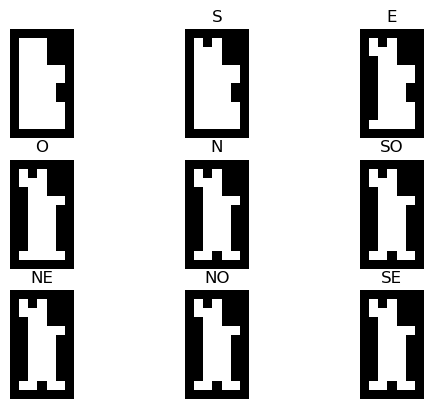

In [7]:
rotulo = ['S','E','O','N','SO','NE','NO','SE']
aux = img.copy()
_,ax = plt.subplots(3,3)
v = ax.ravel()
v[0].imshow(img,cmap='gray')
v[0].axis('off')
for i in range (8):
    aux = aux ^ hit_or_miss (aux,b_set[i][0],b_set[i][1]).astype('uint8')
    v[i+1].imshow(aux,cmap='gray')
    v[i+1].axis('off')
    v[i+1].set_title(rotulo[i])

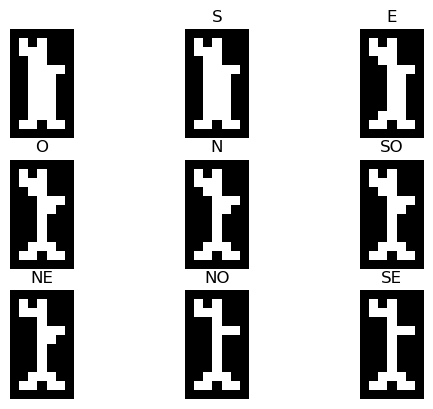

In [8]:
img_aux = aux.copy()
_,ax = plt.subplots(3,3)
v = ax.ravel()
v[0].imshow(img_aux,cmap='gray')
v[0].axis('off')
for i in range (8):
    aux = aux ^ hit_or_miss (aux,b_set[i][0],b_set[i][1]).astype('uint8')
    v[i+1].imshow(aux,cmap='gray')
    v[i+1].axis('off')
    v[i+1].set_title(rotulo[i])

### Exemplo prático - processamento de imagens de digitais

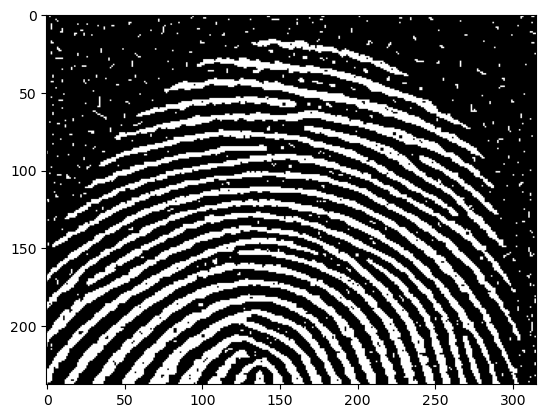

In [9]:
img = (io.imread('digital.png')/255).astype('uint8')
plt.imshow(img,cmap='gray')

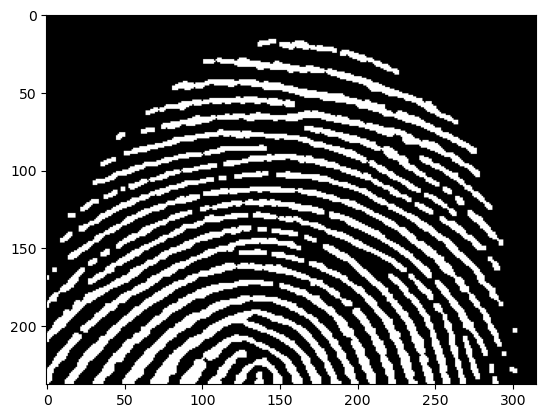

In [27]:
# abertura
b = np.ones ((3,3)).astype('uint8')
img_op = binary_dilation(binary_erosion(img,b))
plt.imshow(img_op,cmap='gray')
# fechamento
img_op = binary_erosion(binary_dilation(img_op,b))
plt.imshow(img_op,cmap='gray')

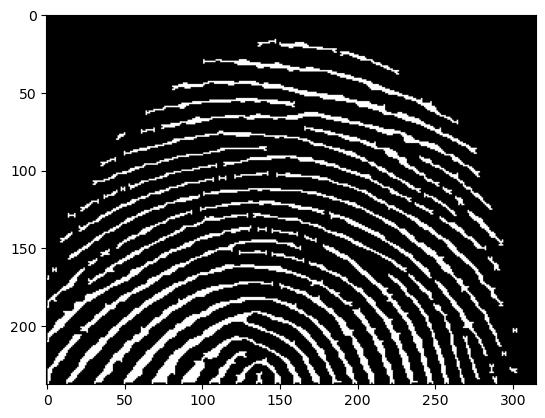

In [28]:
aux = img_op.copy()
for i in range (8):
    aux = aux ^ hit_or_miss (aux,b_set[i][0],b_set[i][1]).astype('uint8')
plt.imshow(aux,cmap='gray')

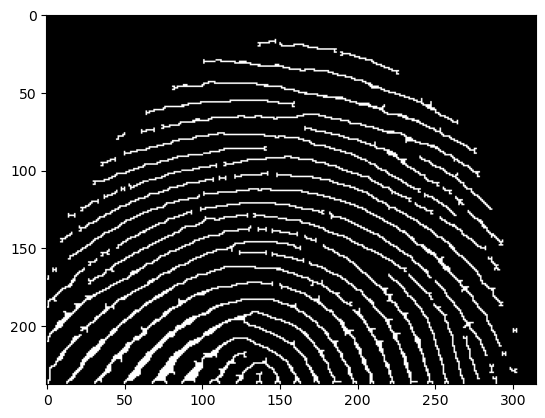

In [29]:
for i in range (8):
    aux = aux ^ hit_or_miss (aux,b_set[i][0],b_set[i][1]).astype('uint8')
plt.imshow(aux,cmap='gray')

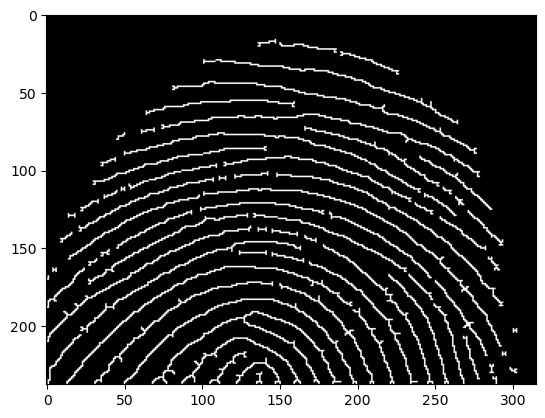

In [30]:
while True:
    img_copy = aux.copy()
    for i in range (8):
        aux = aux ^ hit_or_miss (aux,b_set[i][0],b_set[i][1]).astype('uint8')
    if np.all (img_copy == aux):
        break
plt.imshow(aux,cmap='gray')

## Poda
### Definição dos elementos estruturantes

In [31]:
def rotate (v):
    a = np.ones((3,3))
    a[0,0]=v[0,2]
    a[0,1]=v[1,2]
    a[0,2]=v[2,2]
    a[1,0]=v[0,1]
    a[1,1]=v[1,1]
    a[1,2]=v[2,1]
    a[2,0]=v[0,0]
    a[2,1]=v[1,0]
    a[2,2]=v[2,0]
    return a

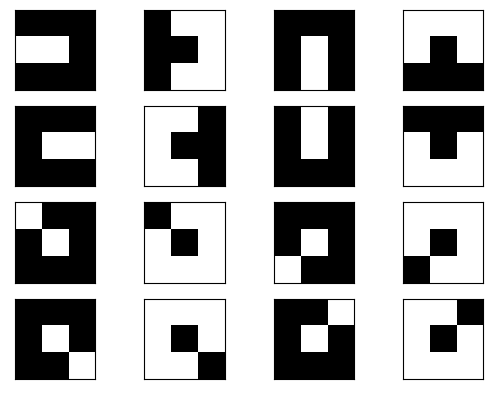

In [32]:
b_set=list()
s=np.zeros((3,3))
sc=np.zeros((3,3))
s[1,:2]=1
sc[0,1:3]=1
sc[2,1:3]=1
sc[1,2]=1
b_set.append ((s.copy(),sc.copy()))
s=rotate(s)
sc=rotate(sc)
b_set.append ((s.copy(),sc.copy()))
s=rotate(s)
sc=rotate(sc)
b_set.append ((s.copy(),sc.copy()))
s=rotate(s)
sc=rotate(sc)
b_set.append ((s.copy(),sc.copy()))
s=np.zeros((3,3))
sc=np.zeros((3,3))
s[0,0]=1
s[1,1]=1
sc[0,1:3]=1
sc[1,0]=1
sc[1,2]=1
sc[2,:]=1
b_set.append ((s.copy(),sc.copy()))
s=rotate(s)
sc=rotate(sc)
b_set.append ((s.copy(),sc.copy()))
s=rotate(s)
sc=rotate(sc)
b_set.append ((s.copy(),sc.copy()))
s=rotate(s)
sc=rotate(sc)
b_set.append ((s.copy(),sc.copy()))
_,ax = plt.subplots (4,4)
v = ax.ravel()
for i in range(8):
    v[2*i].imshow(b_set[i][0],cmap='gray')
    v[2*i].set_xticks([])
    v[2*i].set_yticks([])
    v[2*i+1].imshow(b_set[i][1],cmap='gray')
    v[2*i+1].set_xticks([])
    v[2*i+1].set_yticks([])

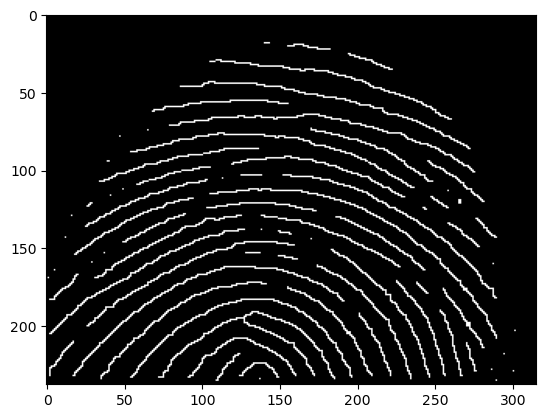

In [37]:
for i in range (8):
    aux = aux ^ hit_or_miss (aux,b_set[i][0],b_set[i][1]).astype('uint8')
plt.imshow(aux,cmap='gray')